In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

**Loading Data**

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

**Normalize the data**

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

**Neural Network Model**

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))   # Flattens input into single flat layer of (28*28)
model.add(tf.keras.layers.Dense(128, activation='relu'))  # REctified Linear Unit
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Output layer. 10 units for 10 digits

**Compile the Model**

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Training the Model**

In [18]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2546 - accuracy: 0.9231
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1054 - accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0739 - accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0572 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0467 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0341 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0310 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0261 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0237 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.018

**Saving the Model**

In [19]:
model.save('digrec.model')

INFO:tensorflow:Assets written to: digrec.model\assets


**Running the Model**

In [20]:
model = tf.keras.models.load_model('digrec.model')

In [21]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1304 - accuracy: 0.9730


1/1 [==============================] - 0s 15ms/step
This digit is probably 5


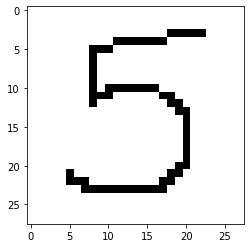

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 16ms/step
This digit is probably 3


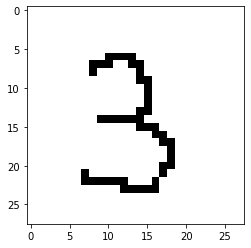

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 15ms/step
This digit is probably 8


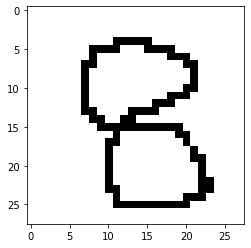

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
1/1 [==============================] - 0s 15ms/step
This digit is probably 5


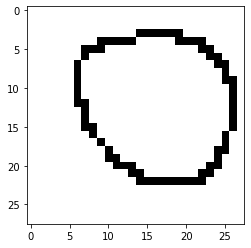

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 14ms/step
This digit is probably 2


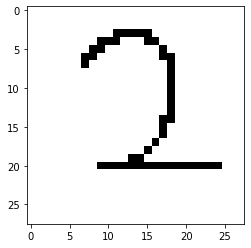

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 15ms/step
This digit is probably 6


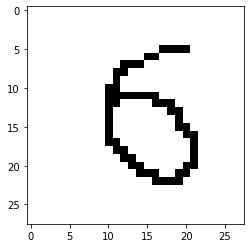

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
1/1 [==============================] - 0s 16ms/step
This digit is probably 4


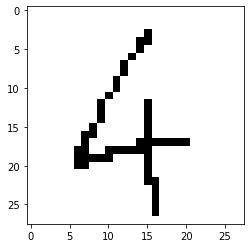

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 15ms/step
This digit is probably 1


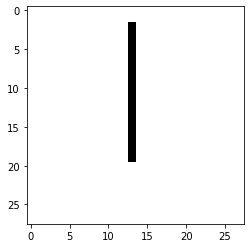

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [26]:
image_number = 1
while os.path.isfile(f"Digits/Digit{image_number}.png"):
    try:
        img = cv2.imread(f"Digits/Digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is probably {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        print(prediction)
    except:
        print("Error!")
    finally:
        image_number+=1
        
